In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import qexpy as q
import qexpy.plotting as plt
# from matplotlib import rc
# rc('font',**{'size': 16})
# rc('lines', **{'linewidth':2.0})
# rc('axes', **{'labelsize':16, 'linewidth':1})
# rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
# rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

def lat(c):
    y = q.asin(c) * 180/np.pi
    return y

def long(b, c): #valid for 0<b<1
    y = q.acos(-b/q.sqrt(1 - c**2)) * 180/np.pi
    return y

def long_neg(b, c): #valid for -1<b<0
    y = q.acos(-b/q.sqrt(1 - c**2)) * 180/np.pi
    return y

R = 695,700  #solar radius in km

def dist(lat1, lat2, long1, long2): #distance between points on sphere
    y = 180/np.pi * q.acos(q.sin(lat1*np.pi/180)*q.sin(lat2*np.pi/180) + q.cos(lat1*np.pi/180)*q.cos(lat2*np.pi/180)*q.cos((long1-long2)*np.pi/180))
    return y


#MODEL FUNCTION BASED ON THEORY OR BEST GUESS
def model(lat, A, B, C):
    y = A + B*(q.sin(lat * np.pi/180))**2 + C*(q.sin(lat* np.pi/180))**4
    return y

#LOAD DATA SETS HERE
data = np.genfromtxt('FINAL DATA SET.txt')
x_0i = data[:, 0] 
y_0i = data[:, 1] 
sigma_0i = data[:, 2]
x_0f = data[:, 3]
y_0f = data[:, 4]
sigma_0f = data[:, 5]
time = data[:, 6]

#reformatting data for QExPy
# unitless
x_i = q.MeasurementArray(x_0i, sigma_0i)
y_i = q.MeasurementArray(y_0i, sigma_0i)

x_f = q.MeasurementArray(x_0f, sigma_0f)
y_f = q.MeasurementArray(y_0f, sigma_0f)


# latitude # degree 
lat_uncert = 7.25 
lat_i = lat(y_i)
lat_f = lat(y_f)
avg_lat = (lat(y_0i)+lat(y_0f))/2

print(lat_i)
print(lat_f)
print(avg_lat)

#longitude # degree
long_i = long(x_i, y_i)
long_f = long(x_f, y_f)

#distance between points # deg
R = 695700 #km
dist = dist(lat_i, lat_f, long_i, long_f)

#angular velocity # deg/min
omega = dist/time * (60*24) 

#print(omega)

avg_lat = q.MeasurementArray(avg_lat, lat_uncert, name = 'Average latitude', unit = 'deg')
omega = q.MeasurementArray(omega, name = 'Angular Velocity', unit = 'deg/day')

print(omega)

# Apply it to the test dataset
result = q.fit(
    xdata = avg_lat,
    ydata = omega,
    model = model, parguess=[1, 1, 1], parnames=["deg/day", "deg/day", "deg/day"], parunits=["deg/day", "deg/day", "deg/day"])
A = result[0]
B = result[1]
C = result[2]

print(result)

[ 27.1 +/- 0.6, 23 +/- 2, 25 +/- 1, 23 +/- 1, 13.8 +/- 0.6, -10 +/- 1, -10 +/- 1, -16 +/- 3, -18 +/- 1 ]
[ 23 +/- 1, 24 +/- 2, 15 +/- 1, 15 +/- 1, 14 +/- 6, -15 +/- 1, -14.6 +/- 0.6, -22 +/- 4, -22 +/- 2 ]
[ 25.29068037  23.54384531  19.62223711  18.90523438  13.6447131
 -12.40556541 -12.39237196 -18.73863828 -19.97468346]
Angular Velocity = [ 19 +/- 5, 13 +/- 7, 30 +/- 4, 29 +/- 3, 29 +/- 8, 33 +/- 2, 33 +/- 2, 33 +/- 6, 34 +/- 3 ] (deg⋅day^-1)
----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
deg/day = 28 +/- 5 [deg⋅day^-1],
deg/day = 200 +/- 100 [deg⋅day^-1],
deg/day = -1200 +/- 600 [deg⋅day^-1]

Correlation Matrix: 
[[ 1.    -0.954  0.887]
 [-0.954  1.    -0.978]
 [ 0.887 -0.978  1.   ]]

chi2/ndof = 4.70/5

--------------- End Fit Results -----------------


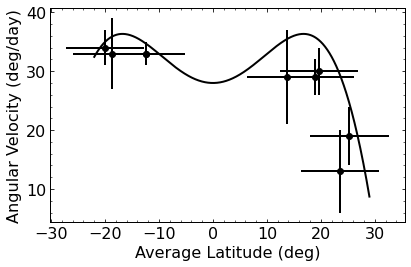

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'size': 16})
rc('lines', **{'linewidth':2.0})
rc('axes', **{'labelsize':16, 'linewidth':1})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

A = 28
B = 200
C = -1200

A_sigma = 5
B_sigma = 100
C_sigma = 600

def model(lat, A, B, C):
    y = A + B*(np.sin(lat * np.pi/180))**2 + C*(np.sin(lat* np.pi/180))**4
    return y

def lat(c):
    y = np.arcsin(c) * 180/np.pi
    return y

avg_lat = (lat(y_0i)+lat(y_0f))/2

lat = np.linspace(-22, 29, 1000)

model = model(lat, A, B, C)

omega = [19, 13, 30, 29, 29, 33, 33, 33, 34]
omega_sigma = [5, 7, 4, 3, 8, 2, 2, 6, 3]

plt.errorbar(avg_lat, omega, xerr = lat_uncert, yerr = omega_sigma, linestyle='none', marker = 'o', color='black')
plt.plot(lat, model, color='black')
plt.xlabel('Average Latitude (deg)')
plt.ylabel('Angular Velocity (deg/day)')
plt.tight_layout()
plt.savefig('final graph.pdf')
plt.show()

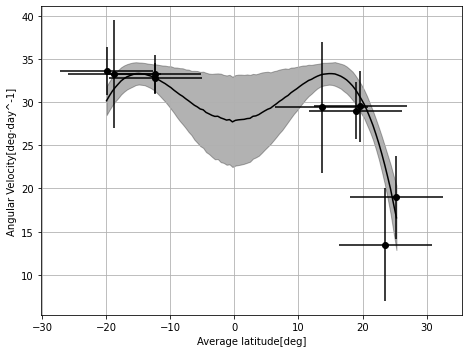

AttributeError: module 'qexpy.plotting' has no attribute 'grid'

In [8]:
# DO NOT USE

figure1 = plt.plot(avg_lat, omega, color = 'black')
figure1.plot(result, color='black')
figure1.show()
plt.grid('false')
plt.savefig('final_plot.pdf')

https://qexpy.readthedocs.io/en/latest/plotting_and_fitting.html#The-Plotting-Module 